# Определение перспективного тарифа для телеком-компании

<font size="4,5"><b>Задача</b></font>

Компания «Мегалайн» — федеральный оператор сотовой связи — предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нужно провести предварительный анализ тарифов на небольшой выборке клиентов — предоставлена выборка из 500 клиентов оператора, — проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<font size="4,5"><b>Данные</b></font>

Выборка 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

<font size="3"><b>Тариф "Смарт"</b></font>

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля
- сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

<font size="3"><b>Тариф "Ультра"</b></font>

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

<font size="4,5"><b>Примечания</b></font>

1. «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.

2. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

3. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.

<font size="4,5"><b>План работы</b></font>

1. Изучение и предобработка данных: 
- проверка на пропуски и дубликаты; 
- проверка типов данных; 
- поиск ошибок в данных и их исправление при необходимости;
- проведение расчетов для дополнения имеющейся информации необходимыми для дальнейшего анализа данными.

2. Проведение исследовательского анализа:
- анализ поведения клиентов оператора, исходя из выборки — сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
- среднее количество, дисперсия и стандартное отклонение;
- описание распределения.

3. Формулирование и проверка гипотез:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

4. Вывод.

# 1. Изучение и предобработка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# подгружаем имеющиеся датасеты

data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_users = pd.read_csv('/datasets/users.csv')

## 1.1. Изучение данных

Информация представлена в пяти отдельных датасетах, ознакомимся с их содержимым, прежде чем принимать решение, как будет правильно объединить данные в одну таблицу, и обработать их.

Начнем с таблицы с информацией о звонках клиентов.

### 1.1.1. Информация о звонках

In [3]:
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица `calls` (информация о звонках):
- id — уникальный номер звонка;
- call_date — дата звонка;
- duration — длительность звонка в минутах;
- user_id — идентификатор пользователя, сделавшего звонок.

In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

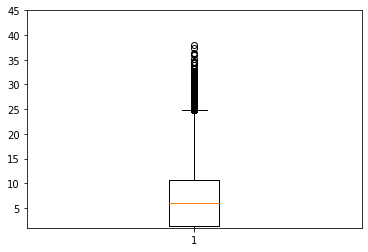

In [5]:
plt.boxplot(data_calls['duration']) # сформируем диграмму размаха столбца duration
plt.ylim(1,45)
data_calls['duration'].describe() # запросим описание столбца

In [6]:
data_calls.duplicated().sum()

0

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено — среднее значение длительность звонка около 7 минут, но и звонки по 38 минут абсолютно реалистичны, отказываться от этих значений нельзя. 

Замечания:
- в столбце `call_date` тип данных необходимо заменить на **datetime**;
- длительность звонка в столбце `duration` можно представить целым числом, так как компания округляет секунды до минут, и изменить тип данных на `int`.

### 1.1.2. Информация о сообщениях

In [7]:
display(data_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Описание данных таблицы `data_message`:
- id — уникальный номер сообщения;
- message_date — дата сообщения;
- user_id — идентификатор пользователя, отправившего сообщение.

In [8]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
data_messages.duplicated().sum()

0

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено.

Замечания:

- в столбце `massage_date` тип данных необходимо заменить на datetime.

### 1.1.3. Информация об интернет-сессиях

In [10]:
display(data_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Описание данных таблицы `data_internet`:
- id — уникальный номер сессии;
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
- session_date — дата интернет-сессии;
- user_id — идентификатор пользователя.

In [11]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

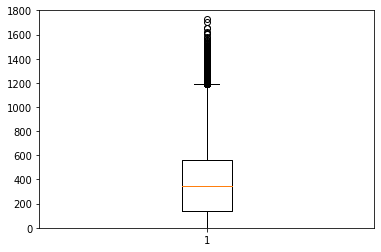

In [12]:
plt.boxplot(data_internet['mb_used'])
plt.ylim(0,1800)
data_internet['mb_used'].describe()

In [13]:
data_internet.duplicated().sum()

0

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено.

Замечания:

- обнаружен столбец, не указанный в документации, и не несущий важной информации — `Unnamed: 0`, — судя по всему, в нем хранятся дубликаты индексов, можно удалить его;
- в столбце `session_date` тип данных необходимо заменить на **datetime**;
- объем мегабайт за одну сессию в столбце `mb_used` можно представить целым числом, так как компания округляет результаты в бОльшую сторону, и изменить тип данных на `int`.

### 1.1.4. Информация о пользователях

In [14]:
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Описание данных таблицы `data_users`:
- user_id — уникальный идентификатор пользователя;
- first_name — имя пользователя;
- last_name — фамилия пользователя;
- age — возраст пользователя (годы);
- reg_date — дата подключения тарифа (день, месяц, год);
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- city — город проживания пользователя;
- tariff — название тарифного плана.

In [15]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
data_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [17]:
data_users.duplicated().sum()

0

Данные полные, пропуски в столбце `churn_date` обусловлены количеством отказавшихся от тарифа пользователей — их всего 38. Некорректных значений и дубликатов не обнаружено.

Средний возраст пользователя — 46 лет, самый молодой абонет 18 лет, самый пожилой — 75 лет.

Замечания:

- в столбцах `reg_data` и `churn_date` тип данных необходимо заменить на **datetime**;
- заменим значения NaN в столбце `churn_date` на 0.

### 1.1.5. Информация о тарифах

Проверим и таблицу с информацией о тарифах на соответствие данных их типам.

In [18]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Все типы соответствуют представленным данным.

## 1.2. Подготовка пользовательских данных

### 1.2.1. Замена типов данных

Изменим типы данных во всех столбцах с датами:

In [19]:
# проводим замену типа данных
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])

# проверяем результат
data_calls.info()
data_internet.info()
data_messages.info()
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), objec

Округлим значения длительности звонка и изменим тип данных столбца:

In [20]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<!-- Удалим лишний столбец в таблице `data_internet`, округлим значения потраченных мегабайт и заменим тип данных столбца: -->

### 1.2.2. Сортировка по месяцам

Добавим в таблицы `data_calls`, `data_internet`, `data_messages` столбец с обозначением месяца для дальнейшего удобства работы с данными.

In [22]:
# добавим столбец с обозначением месяца
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

# проверим результат
display(data_calls.head())
display(data_internet.head())
display(data_messages.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Теперь посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [23]:
# сгруппируем данные о звонках по месяцу и id пользователя
data_calls_per_month = data_calls.groupby(['month', 'user_id'])['duration'].agg(['sum'])
# переименуем столбец для удобства чтения таблицы
data_calls_per_month = data_calls_per_month.rename(columns={'sum': 'duration_call'})
display(data_calls_per_month)

duration_call
month user_id               
1     1005                95
      1032               380
      1045                 9
      1055               551
      1071               194
...                      ...
12    1494               418
      1495              1031
      1496               518
      1497               545
      1499               492

[3174 rows x 1 columns]

Соберем информацию о количестве сообщений в месяц, отправленных каждым пользователем.

In [24]:
data_messages_per_month = data_messages.groupby(['month', 'user_id'])['message_date'].agg(['count'])
data_messages_per_month = data_messages_per_month.rename(columns={'count': 'messages_per_month'})
display(data_messages_per_month)

messages_per_month
month user_id                    
1     1005                      7
      1032                     38
      1045                      5
      1055                     30
      1071                     16
...                           ...
12    1493                     78
      1495                     84
      1496                     51
      1497                     17
      1499                     66

[2717 rows x 1 columns]

Посчитаем объем израсходованного за каждый месяц интернет-трафика:

In [25]:
data_internet_per_month = data_internet.groupby(['month', 'user_id'])['mb_used'].agg(['sum'])
data_internet_per_month = data_internet_per_month.rename(columns={'sum': 'mb_per_month'})
display(data_internet_per_month)

mb_per_month
month user_id              
1     1005          2727.97
      1032         24127.69
      1045          2346.71
      1055         17090.88
      1071         15604.34
...                     ...
12    1494         17621.21
      1495         23426.76
      1496         20736.15
      1497         19918.60
      1499         13055.58

[3203 rows x 1 columns]

Соединим получившиеся таблицы в одну и определим, какой тариф у каждого из клиентов.

In [26]:
data = data_calls_per_month.merge(data_messages_per_month, on=['month', 'user_id'], how='outer').reset_index()
data = data.merge(data_internet_per_month, on=['month', 'user_id'], how='outer')
data = data.merge(data_users[['user_id', 'tariff']], on='user_id', how='outer')
display(data)

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff
0,1.0,1005,95.0,7.0,2727.97,smart
1,2.0,1005,456.0,38.0,7383.93,smart
2,3.0,1005,606.0,56.0,11104.25,smart
3,4.0,1005,712.0,41.0,9351.72,smart
4,5.0,1005,595.0,42.0,7865.53,smart
...,...,...,...,...,...,...
3211,10.0,1328,NaN,6.0,22427.98,ultra
3212,11.0,1328,NaN,8.0,35525.58,ultra
3213,12.0,1328,NaN,7.0,39419.73,ultra
3214,NaN,1128,NaN,NaN,NaN,ultra


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month               3214 non-null   float64
 1   user_id             3216 non-null   int64  
 2   duration_call       3174 non-null   float64
 3   messages_per_month  2717 non-null   float64
 4   mb_per_month        3203 non-null   float64
 5   tariff              3216 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 175.9+ KB


У нас образовались пропуски в столбцах `month`,`duration_call`, `messages_per_month`, `mb_per_month`.

Заменим все возникшие NaN на нули, запомним, что в месяце тоже появятся нули, которые будут обозначать пользователей, не использовавших тариф вообще.

In [28]:
data[['month', 'duration_call', 'messages_per_month', 'mb_per_month']] = data[['month', 'duration_call', 'messages_per_month', 'mb_per_month']].fillna(0)

Заменим тип данных в столбцах `month`,`duration_call`, `messages_per_month` на **int**.

In [29]:
data[['month', 'duration_call', 'messages_per_month']] = data[['month', 'duration_call', 'messages_per_month']].astype('int')
display(data.sort_values(by=['user_id', 'month']))

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff
1702,5,1000,159,22,2253.49,ultra
1703,6,1000,172,60,23233.77,ultra
1704,7,1000,340,75,14003.64,ultra
1705,8,1000,408,81,14055.93,ultra
1706,9,1000,466,57,14568.91,ultra
...,...,...,...,...,...,...
2551,10,1498,247,42,20579.36,smart
2923,9,1499,70,11,1845.75,smart
2924,10,1499,449,48,17788.51,smart
2925,11,1499,612,59,17963.31,smart


### 1.2.3. Помесячная выручка

Теперь посчитаем помесячную выручку с каждого пользователя.

Обратимся к данным о тарифах:

In [30]:
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Напишем функцию для расчета выручки.

In [31]:
# задаем имя функции и переменные внутри функции, обозначающие нужные нам столбцы
def revenue(df):
    calls = df['duration_call']
    messages = df['messages_per_month']
    internet = df['mb_per_month']
    tariff = df['tariff']
    
# задаем условие, по которому будем определять, каким тарифом пользуется абонент
    if tariff == 'smart':
        i = 0
    else:
        i = 1

# прописываем логику проверки разности фактической длительности звонков в месяц и количества минут, заложенных в тарифе
    remainder_calls = calls - data_tariffs['minutes_included'][i]
    if remainder_calls > 0:
        revenue_calls = remainder_calls * data_tariffs['rub_per_minute'][i]
    else:
        revenue_calls = 0

# аналогично поступаем с сообщениями и интернет-трафиком
    remainder_messages = messages - data_tariffs['messages_included'][i]
    if remainder_messages > 0:
        revenue_messages = remainder_messages * data_tariffs['rub_per_message'][i]
    else:
        revenue_messages = 0
        
    remainder_internet = internet - data_tariffs['mb_per_month_included'][i] 
    if remainder_internet > 0:
        revenue_internet = (np.ceil(remainder_internet / 1024)) * data_tariffs['rub_per_gb'][i] # парарллельно переводим mb в Gb
    else:
        revenue_internet = 0

# считаем прибыль
    revenue = revenue_calls + revenue_messages + revenue_internet + data_tariffs['rub_monthly_fee'][i]
    return revenue

In [32]:
data ['revenue'] = data.apply(revenue,axis=1) # используем функцию для формирвоания нового столбца в таблице с прибылью
display(data)

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff,revenue
0,1,1005,95,7,2727.97,smart,550.0
1,2,1005,456,38,7383.93,smart,550.0
2,3,1005,606,56,11104.25,smart,886.0
3,4,1005,712,41,9351.72,smart,1186.0
4,5,1005,595,42,7865.53,smart,835.0
...,...,...,...,...,...,...,...
3211,10,1328,0,6,22427.98,ultra,1950.0
3212,11,1328,0,8,35525.58,ultra,2700.0
3213,12,1328,0,7,39419.73,ultra,3300.0
3214,0,1128,0,0,0.00,ultra,1950.0


## 1.3. Вывод

В целом состояние предоставленных данных хорошее — пропусков обнаружено не было, дубликатов также не выявлено.

Были исправлены типы данных в столбцах, содержащих даты. Данные приведены к целочисленным значениям — округлены в бОльшую сторону в соответствии с политикой компании.

Пропущенные значения заменены на 0, так как обозначают именно отсутствие данных — абонент не использовал ту или иную возможность тарифа или связь вообще.

Мы отсортировали траты пользователей по месяцам и посчитали ежемесячную выручку с каждого абонента. Эта информация позволит нам в дальнейшем проанализировать прибыльность тарифов.

## 2. Анализ данных

Добавим в получившуюся таблицу информацию о клиентах, чтобы получить более полную картину:

In [34]:
data = data.merge(data_users[['user_id', 'first_name', 'age', 'churn_date', 'city', 'reg_date']], on='user_id', how='outer')
data = data.sort_values(by=['month', 'user_id']).reset_index(drop=True) # соритируем таблицу по месяцам и пользователям
display(data.head())

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff,revenue,first_name,age,churn_date,city,reg_date
0,0,1128,0,0,0.00,ultra,1950.0,Ксения,51,2018-12-23,Волжский,2018-12-15
1,0,1371,0,0,0.00,smart,550.0,Ириней,50,2018-12-30,Омск,2018-12-25
2,1,1005,95,7,2727.97,smart,550.0,Афанасий,67,NaT,Набережные Челны,2018-01-25
3,1,1032,380,38,24127.69,smart,2350.0,Инна,31,NaT,Ульяновск,2018-01-04
4,1,1045,9,5,2346.71,smart,550.0,Джемма,48,NaT,Улан-Удэ,2018-01-30


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month               3216 non-null   int64         
 1   user_id             3216 non-null   int64         
 2   duration_call       3216 non-null   int64         
 3   messages_per_month  3216 non-null   int64         
 4   mb_per_month        3216 non-null   float64       
 5   tariff              3216 non-null   object        
 6   revenue             3216 non-null   float64       
 7   first_name          3216 non-null   object        
 8   age                 3216 non-null   int64         
 9   churn_date          189 non-null    datetime64[ns]
 10  city                3216 non-null   object        
 11  reg_date            3216 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 301.6+ KB


Уберем информацию об абонентах, которые не пользовались связью вообще, в следующих вычислениях они будут только мешать:

In [36]:
data = data[data['month'] > 0].reset_index(drop=True)

Распределим пользователей по тарифам:

In [37]:
tariff_smart = data.query('tariff == "smart"').reset_index(drop=True)
tariff_smart.head()

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff,revenue,first_name,age,churn_date,city,reg_date
0,1,1005,95,7,2727.97,smart,550.0,Афанасий,67,NaT,Набережные Челны,2018-01-25
1,1,1032,380,38,24127.69,smart,2350.0,Инна,31,NaT,Ульяновск,2018-01-04
2,1,1045,9,5,2346.71,smart,550.0,Джемма,48,NaT,Улан-Удэ,2018-01-30
3,1,1055,551,30,17090.88,smart,1103.0,Луиза,39,NaT,Казань,2018-01-02
4,1,1071,194,16,15604.34,smart,750.0,Гектор,20,2018-08-31,Омск,2018-01-09


### 2.1. Звонки

In [38]:
tariff_smart[['duration_call']].describe()

,duration_call
count,2229.000000
mean,417.934948
std,190.313730
min,0.000000
25%,282.000000
50%,422.000000
75%,545.000000
max,1435.000000


In [39]:
print('Дисперсия длительности звонков тарифа Smart:', np.var(tariff_smart['duration_call'], ddof=1))

Дисперсия длительности звонков тарифа Smart: 36219.31578434428


In [40]:
tariff_ultra = data.query('tariff == "ultra"').reset_index(drop=True)
tariff_ultra.head()

,month,user_id,duration_call,messages_per_month,mb_per_month,tariff,revenue,first_name,age,churn_date,city,reg_date
0,1,1120,55,0,656.75,ultra,1950.0,Агнесса,25,NaT,Краснодар,2018-01-24
1,1,1126,272,4,16363.03,ultra,1950.0,Яна,71,NaT,Санкт-Петербург,2018-01-19
2,1,1168,277,14,8152.07,ultra,1950.0,Лилия,28,NaT,Кострома,2018-01-24
3,1,1254,466,0,19685.01,ultra,1950.0,Александра,75,2018-08-17,Москва,2018-01-04
4,1,1375,852,75,14550.66,ultra,1950.0,Мария,53,NaT,Пенза,2018-01-04


In [41]:
tariff_ultra[['duration_call']].describe()

,duration_call
count,985.000000
mean,526.623350
std,317.606098
min,0.000000
25%,284.000000
50%,518.000000
75%,752.000000
max,1673.000000


In [42]:
print('Дисперсия длительности звонков тарифа Ultra:', np.var(tariff_ultra['duration_call'], ddof=1))

Дисперсия длительности звонков тарифа Ultra: 100873.63339730098


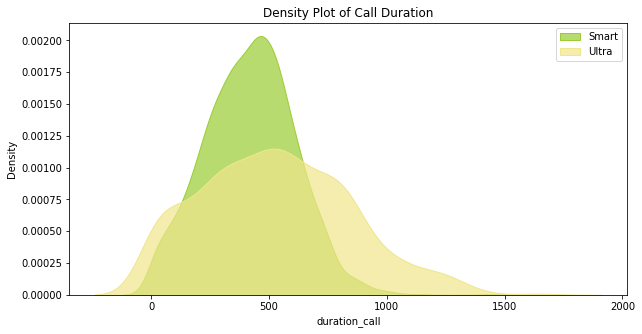

In [43]:
plt.figure(figsize=(10,5))
sns.kdeplot(tariff_smart['duration_call'], shade=True, color="yellowgreen", label="Smart", alpha=.7)
sns.kdeplot(tariff_ultra['duration_call'], shade=True, color="khaki", label="Ultra", alpha=.7)
plt.title('Density Plot of Call Duration', fontsize=12)
plt.legend()
plt.show()

Нормальное распределение.

Несмотря на то, что среднее количество минут в рамках лимита, более 25% абонентов абонентов тарифа Smart используют дополнительные минуты.

Половина абонентов тарифа Ultra используют до 518 минут в месяц из возможных 3000 минут и 25% абонентов используют только 284 минуты, что составляет 9,4% от лимита.

Также видно, что часть клиентов в обоих тарифах не использует минуты вовсе. Скорее всего, эти клиенты более активно используют интернет.

### 2.2. Сообщения

In [49]:
tariff_smart[['messages_per_month']].describe()

,messages_per_month
count,2229.000000
mean,33.384029
std,28.227876
min,0.000000
25%,10.000000
50%,28.000000
75%,51.000000
max,143.000000


In [50]:
print('Дисперсия количества сообщений тарифа Smart:', np.var(tariff_smart['messages_per_month'], ddof=1))

Дисперсия количества сообщений тарифа Smart: 796.8129584480083


In [51]:
tariff_ultra[['messages_per_month']].describe()

,messages_per_month
count,985.000000
mean,49.363452
std,47.804457
min,0.000000
25%,6.000000
50%,38.000000
75%,79.000000
max,224.000000


In [52]:
print('Дисперсия количества сообщений тарифа Ultra:', np.var(tariff_ultra['messages_per_month'], ddof=1))

Дисперсия количества сообщений тарифа Ultra: 2285.266142544674


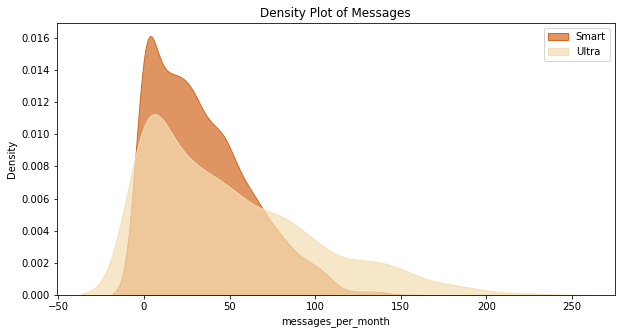

In [53]:
plt.figure(figsize=(10,5))
sns.kdeplot(tariff_smart['messages_per_month'], shade=True, color="chocolate", label="Smart", alpha=.7)
sns.kdeplot(tariff_ultra['messages_per_month'], shade=True, color="wheat", label="Ultra", alpha=.7)
plt.title('Density Plot of Messages', fontsize=12)
plt.legend()
plt.show()

Распределение скошено влево.

Пакет тарифа Smart включает 50 сообщений в месяц, 25% абонентов превышает лимит и дополнительно оплачивает сообщения.

Пользователи тарифа Ultra имеют 1000 включенных сообщений в месяц, но максимум используется только 22,4% от всего пакета.

### 2.3. Интернет-трафик

In [56]:
tariff_smart[['mb_per_month']].describe()

,mb_per_month
count,2229.000000
mean,16208.386990
std,5870.476681
min,0.000000
25%,12643.010000
50%,16506.840000
75%,20042.930000
max,38552.450000


In [57]:
print('Дисперсия интернет-трафика тарифа Smart:', np.var(tariff_smart['mb_per_month'], ddof=1))

Дисперсия интернет-трафика тарифа Smart: 34462496.46274241


In [58]:
tariff_ultra[['mb_per_month']].describe()

,mb_per_month
count,985.000000
mean,19468.805208
std,10087.170752
min,0.000000
25%,11770.260000
50%,19308.010000
75%,26837.690000
max,49745.690000


In [59]:
print('Дисперсия интернет-трафика тарифа Ultra:', np.var(tariff_ultra['mb_per_month'], ddof=1))

Дисперсия интернет-трафика тарифа Ultra: 101751013.78335385


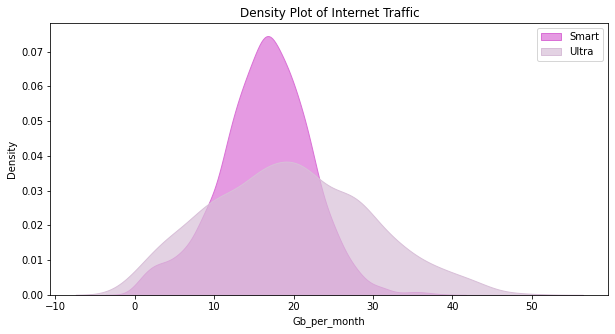

In [60]:
# переведем мб в гб
tariff_smart_gb = np.ceil(tariff_smart['mb_per_month'] / 1024)
tariff_ultra_gb = np.ceil(tariff_ultra['mb_per_month'] / 1024)

# построим график
plt.figure(figsize=(10,5))
sns.kdeplot(tariff_smart_gb, shade=True, color="orchid", label="Smart", alpha=.7)
sns.kdeplot(tariff_ultra_gb, shade=True, color="thistle", label="Ultra", alpha=.7)
plt.title('Density Plot of Internet Traffic', fontsize=12)
plt.xlabel('Gb_per_month')
plt.legend()
plt.show()

Лимит тарифа Smart — 15 Гб. Мы видим, что больше половины абонентов превышают лимит и вынуждены доплачивать за дополнительный интернет.

Абоненты тарифа Ultra имеют лимит в 30 Гб, но чуть меньше 25% все равно не укладываются в имеющееся ограничение.

Оценим количество абонентов каждого тарифа.

In [76]:
users_smart = data_users.query('tariff == "smart"')['tariff'].count()
churn_smart = data_users.query('tariff == "smart" and churn_date != "NaN"')['tariff'].count()
procent_churn_smart = churn_smart / users_smart * 100
print('Всего пользователей тарифа Smart из выборки:', users_smart)
print('Процент оттока абонентов:', round((procent_churn_smart), 2))

Всего пользователей тарифа Smart из выборки: 351
Процент оттока абонентов: 6.55


In [77]:
users_ultra = data_users.query('tariff == "ultra"')['tariff'].count()
churn_ultra = data_users.query('tariff == "ultra" and churn_date != "NaN"')['tariff'].count()
procent_churn_ultra = churn_ultra / users_ultra * 100
print('Всего пользователей тарифа Ultra из выборки:', users_ultra)
print('Процент оттока абонентов:', round((procent_churn_ultra), 2))

Всего пользователей тарифа Ultra из выборки: 149
Процент оттока абонентов: 10.07


### 2.4. Вывод

<!-- Проанализировав средние показатели, мы пришли к выводу, что тариф Ultra демонстрирует более высокие значения, чем тариф Smart. Абоненты тарифа Ultra в среднем дольше разговаривают по телефону, отправляют больше сообщений и имеют больший интернет-трафик. 
 
При этом дисперсия при анализе значений тарифа Ultra высокая, разброс значений внутри этого тарифа гораздо больше, чем у тарифа Smart. Стандартное отклонение также выше. -->
Анализ демонстрирует несбалансированность обоих тарифов: Smart не закрывает все потребности абонентов, из-за чего им приходится доплачивать за дополнительные минуты, сообщения и интернет, тогда как пользователи тарифа Ultra зачастую не используют даже половину включенного пакета. Исключение для тарифа Ultra составляет интернет-трафик, где почти 25% превышает имеющийся лимит.

Сетка тарифов требует доработки и расширения возможностей абонентов.

# 3. Проверка гипотез

Сформулируем две гипотезы и проверим их на имеющихся данных. Для проверки используем t-критерий Стьюдента, который позволяет работать с выборками любого размера.

## 3.1. Проверка №1

Формулируем гипотезы:

- Нулевая гипотеза — выручка абонентов тарифа Smart равна выручке абонентов тарифа Ultra.
- Альтернативная гипотеза — выручка абонентов тарифа Smart не равна выручке абонентов тарифа Ultra.

In [78]:
# создадим переменные с информацией о выручке каждого из тарифов
revenue_smart = data.query('tariff == "smart"')[['revenue']].reset_index(drop=True)

revenue_ultra = data.query('tariff == "ultra"')[['revenue']].reset_index(drop=True)

In [79]:
alpha = 0.05

results = st.ttest_ind(revenue_smart['revenue'], revenue_ultra['revenue'], equal_var=False)

print('p-значение:', results.pvalue / 2) # делим на 2, так как наша гипотеза двусторонняя

if (results.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.1303156965538042e-250
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута: выручка абонентов тарифа Smart не равна выручке абонентов тарифа Ultra.

In [80]:
revenue_smart['revenue'].sum()

2875351.0

In [81]:
revenue_ultra['revenue'].sum()

2039100.0

Мы видим, что суммарная выручка абонентов тарифа Smart больше, чем абонентов тарифа Ultra.

## 3.2. Проверка №2

Формулируем гипотезы:

- Нулевая гипотеза — средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- Альтернативная гипотеза — средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [83]:
moscow_revenue = data.query('city == "Москва"')[['revenue']].reset_index()

other_city_revenue = data.query('city != "Москва"')[['revenue']].reset_index()

In [84]:
alpha = 0.05

results = st.ttest_ind(moscow_revenue['revenue'], other_city_revenue['revenue'], equal_var=False)

print('p-значение:', results.pvalue / 2)

if (results.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2628688331864649
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтверждена: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

In [85]:
moscow_revenue['revenue'].mean()

1546.7135842880523

In [86]:
other_city_revenue['revenue'].mean()

1524.9362274298885

Средняя выручка пользователей из Москвы статистически не критично отличается от средней выручки по другим городам.

## 3.3. Вывод

Так как у нас не было уверенности в рандомности изначальной выборки, мы провели дополнительный рандомный отборы половины значений из имеющейся выборки клиентов.
 
В рамках первой проверки была сформулирована нулевая гипотеза: выручка абонентов тарифа Smart равна выручке абонентов тарифа Ultra.
 
И альтернативная гипотеза двусторонняя гипотеза: выручка абонентов тарифа Smart не равна выручке абонентов тарифа Ultra.
 
В результате проведения t-теста Стьюдента, который был выбран, так как позволяет не фокусироваться на объеме имеющейся выборки, нулевая гипотеза была отвергнута.
 
<!-- Построенный график прибыльности для обоих тарифов наглядно продемонстрировал, что тариф Ultra более прибыльный, несмотря на то, что превышение тарифных лимитов у него небольшое. -->
 
В рамках второй гипотезы была сформулирована нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
 
И альтернативная двусторонняя гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
Проведенный t-тест не позволил отбросить нулевую гипотезу.

# 4. Общий вывод

Мы проверили и обработали данные, предоставленные на анализ, — пропусков и дубликатов не обнаружено, были исправлены типы данных и округлены значения в соответствии с подходом компании в отношении минут и интернет-трафика.
 
Пропущенные значения в датасете были заменены на нули, так как пропуски обозначали те возможности тарифов, которые клиенты не использовали.
 
Траты абонентов были отсортированы по месяцам, проведены расчеты ежемесячной выручки с каждого абонента.

**Выводы**

1. Абоненты тарифа Smart регулярно превышают лимиты тарифа, тогда как абоненты тарифа Ultra не расходуют большую часть включенных пакетов. 
 
Компании следует уделить внимание разработке дополнительных тарифов для абонентов, иначе есть риск потерять имеющихся клиентов: процент оттока с тарифа Ultra выше, чем с тарифа Smart. Клиенты, не вписывающиеся в лимиты тарифа Smart, но не нуждающиеся в больших пакетах как на тарифе Ultra, чтобы платить такую высокую абонентскую плату, ищут более выгодные предложения.
 
Есть смысл продумать тариф, имеющий большой пакет интернета, но не увеличивающий пакеты звонков и сообщений, так как пользователи тарифа Smart не выходят за рамки этих пакетов, но с каждым месяцем все больше превышают лимит интернет-трафика.
 
2. Гипотеза о том, что выручка абонентов тарифа Smart равна выручке абонентов тарифа Ultra, была отвергнута.
 
Тариф Smart более прибыльный по сравнению с тарифом Ultra за счет превышения тарифных пакетов, но в долгосрочной перспективе это минус — абоненты будут искать более выгодные тарифы у конкурентов, если компания не предложит им другие варианты.
 
3. Гипотеза о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, не была отвергнута.
 
Таким образом, нет смысла фокусироваться только на московских клиентах, рекламная кампания будет актуальна для всех регионов.